2) Convolution. (Use Dataset A)
Convolution provides a way of multiplying two arrays to produce a third array. Depending on the designed
filter and the intended effect, the kernel can be a matrix of dimensions, for example, 3x3, 5x5 or 7x7.
a) Code a function that takes an input image, performs convolution with a given kernel, and returns the
resulting image.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#function that takes an input image, performs convolution with a given kerne, and returns the resulting image.
def ICV_convolution(image, kernel):
    #load image array
    image_array = np.array(image)
    #image h,w
    image_height, image_width, channels = image_array.shape
    #kernel h,w
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the resulting image
    #The formula output_height = image_height - kernel_height + 1 and output_width = image_width - kernel_width + 1 takes into account the movement of the kernel. 
    #After the kernel slides through the entire image, the resulting image dimensions will be reduced by kernel_height - 1 in height and kernel_width - 1 in width. 
    #This ensures that the resulting image only includes valid positions where the kernel fully overlaps with the input image
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # initialize/create the output image
    output_image = np.zeros((output_height, output_width, channels), dtype=np.uint8)

    # perform 2D convolution for each pixel in each color channel
    #this extracts a region from the input image corresponding to the current position of the kernel, using both height and width dimensions and the color channel.
    #then, it performs element-wise multiplication with the convolution kernel.
    #this process is repeated for each color channel, and the resulting values are summed to calculate the convolution at that specific position.
    for c in range(channels):
        for i in range(output_height):
            for j in range(output_width):
                # Convolution formula: result[i, j, c] = sum(kernel * image[i:i+kernel_height, j:j+kernel_width, c])
                #Calculates the sum of element-wise multiplication between the kernel and the corresponding region of the input image for the specified channel.
                output_image[i, j, c] = np.sum(image_array[i:i+kernel_height, j:j+kernel_width, c] * kernel)
    return Image.fromarray(output_image.astype(np.uint8))


b) Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region.
Use this kernel and the filtering function above, and save the resulting image.

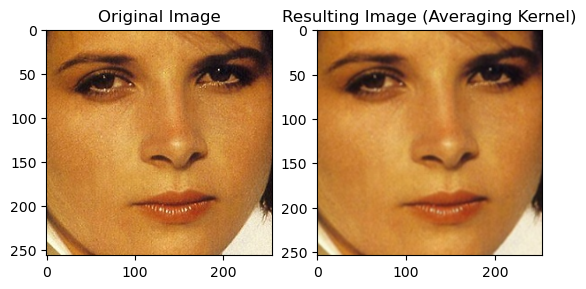

In [2]:

#create a kernel with all elements set to 1/9, so to take the average. 
average_kernel = np.ones((3, 3)) / 9

# use dataset A face-3.jpg
image = Image.open('face-3.jpg') 

#apply convolution using above function
result_image = ICV_convolution(image, average_kernel)

# save the resulting image
result_image.save('q2_face-3_average_kernel.jpg')

# Display the original and resulting images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Resulting Image (Averaging Kernel)')
plt.imshow(result_image)
plt.show()


#c) Use the kernels provided below, apply the filtering function and save the resulting images. Comment
#on the effect of each kernel.
kernel A
1 2 1
2 4 2
1 
2 1
kern
el B
0 1 0
1 -4 1
0 1 0

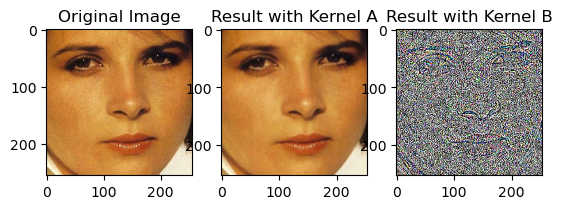

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# using face-3 image
image = Image.open('face-3.jpg')

#  kernel A and B
#kernel A normalization is applied to maintain a pixel intensities in the range
kernel_a = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
kernel_b = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Apply convolution with each kernel
result_image_a = ICV_convolution(image, kernel_a)
result_image_a.save('q2_face-3_kernel_a.jpg')

result_image_b = ICV_convolution(image, kernel_b)
result_image_b.save('q2_face-3_kernel_b.jpg')

# Display the original and resulting images
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.title('Result with Kernel A')
plt.imshow(result_image_a)
plt.subplot(1, 3, 3)
plt.title('Result with Kernel B')
plt.imshow(result_image_b)
plt.show()

d) Use the filtering function for the following filtering operations: (i) A followed by A; (ii) A followed by B;
(iii) B followed by A. Comment the results.

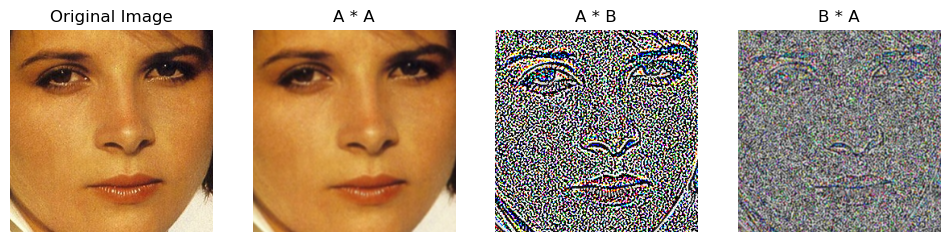

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# use image face-3
image = Image.open('face-3.jpg')
#  the kernels
#kernel A normalization is applied to maintain a pixel intensities in the range
kernel_a = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
kernel_b = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Filtering operations by kernel a and kernel b
result_a_a = ICV_convolution(ICV_convolution(image, kernel_a), kernel_a)
result_a_a.save('q2_face-3_kernel_a_a.jpg')

result_a_b = ICV_convolution(ICV_convolution(image, kernel_a), kernel_b)
result_a_b.save('q2_face-3_kernel_a_b.jpg')

result_b_a = ICV_convolution(ICV_convolution(image, kernel_b), kernel_a)
result_b_a.save('q2_face-3_kernel_b_a.jpg')


# Display the original and resulting images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(result_a_a)
plt.title('A * A')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(result_a_b)
plt.title('A * B')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_b_a)
plt.title('B * A')
plt.axis('off')

plt.show()